# Car Sales Analysis
The purpose of this document is to provide exploratory analysis of car sales data ranging from December 2014 to July 2015. Our team asks questions related to geographical location, make, model, and vehicle type.

In [9]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import random
import json
import scipy.stats as stats

# Import the API key
from config import car_key
from config import car_secret_key


In [10]:
path = Path('Resources/car_sales_clean.csv')
cars_clean_df = pd.read_csv(path, encoding="utf-8")


In [11]:
path = Path('Resources/type_price_data.csv')
type_price_data_df = pd.read_csv(path, encoding="utf-8")

In [12]:
path = Path('Resources/stats_by_type.csv')
stats_by_type = pd.read_csv(path, encoding="utf-8")


In [13]:
path = Path('Resources/sorted_by_date.csv')
car_sales_sorted = pd.read_csv(path, encoding='utf-8')

# How do car sales vary by region?

In [14]:
# Wisdom's map here

# Are there any correlations between type, features and sales performance? 
### Vehicle types can be defined as convertible, coupe, hatchback, minivan, SUV, sedan, truck, van and wagon. Features include aspects like colors and odometer. These varibles must have an impact on vehicle price and our goal is to uncover what kind of impact they have.

### Type price distributions
#### The following boxplots represent the distribution of prices for each vehicle type. The first has outliers included and the second has the outliers hidden and means shown.
Convertibles and coupes have many outliers, with a distribution that is skewed right. This is supported by the second boxplot for convertibles and coupes, as both means are higher than the medians. Means are less resistant to outlying data. Though hatchbacks and sedans both have outliers, these distributions appear to be the most normally distributed. This may be due to a smaller range in prices. Looking at the second boxplot for these types reveals means that are very close to the medians. The remaining types all show longer upper tails than lower tails, with means and medians approximately the same except for vans. The boxplot for vans shows a median that is higher than its mean.

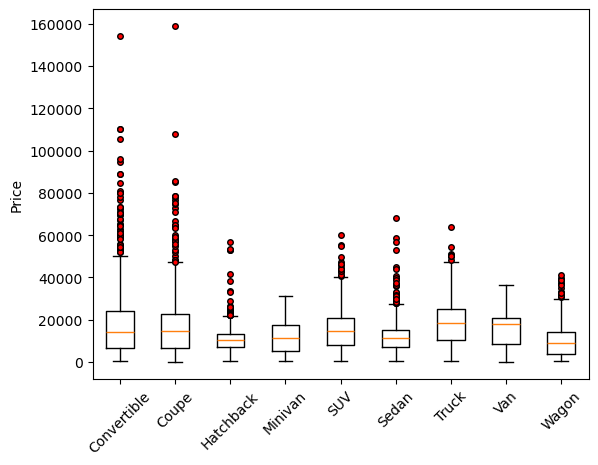

In [15]:
types = stats_by_type['type'].tolist()

plt.boxplot(type_price_data_df, labels=types, flierprops={'markersize': 4, 'markerfacecolor': 'red'})
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.show()

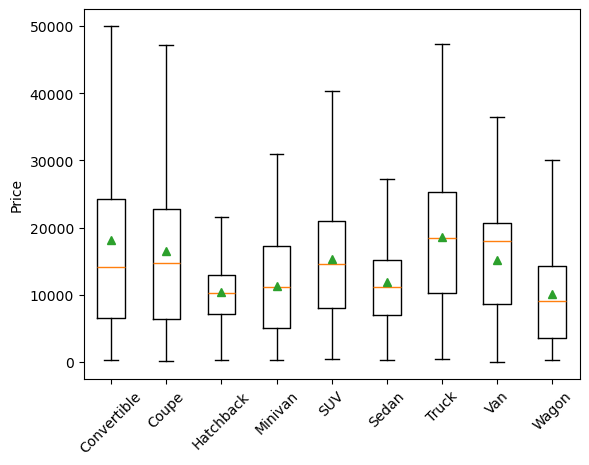

In [16]:
plt.boxplot(type_price_data_df, labels=types, showfliers=False, showmeans=True)
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [17]:
group_types_clean = car_sales_sorted.groupby('type')

type_dataframes_clean = {type: group for type, group in group_types_clean}

conv_dict = {'Convertible': type_dataframes_clean['Convertible'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
coupe_dict = {'Coupe': type_dataframes_clean['Coupe'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
minivan_dict = {'Minivan': type_dataframes_clean['Minivan'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
suv_dict = {'SUV': type_dataframes_clean['SUV'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
sedan_dict = {'Sedan': type_dataframes_clean['Sedan'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
truck_dict = {'Truck': type_dataframes_clean['Truck'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
van_dict = {'Van': type_dataframes_clean['Van'].groupby(['saleyear', 'month'])['year'].count().reset_index()}
wagon_dict = {'Wagon': type_dataframes_clean['Wagon'].groupby(['saleyear', 'month'])['year'].count().reset_index()}

type_dict_list = [conv_dict, coupe_dict, minivan_dict, suv_dict, sedan_dict, truck_dict, van_dict, wagon_dict]


### Type price data over time
#### The following line chart represents the change of price in vehicle type for every month present in the data set. The sales data was only available from Dec 2014 to July 2015, with a gap in April. Despite these limitations of the data, meaningful information about vehicles can be derived.
Each vehicle type has relatively consistent sales over time, with sedans selling the most overall and vans selling the least. The month with the most sales overall is February, with sedan sales just under 70000. There is a massive decrease in sales from February to April, but this is most likely due to an issue with the data set. The largest increase in sales is from January to February.

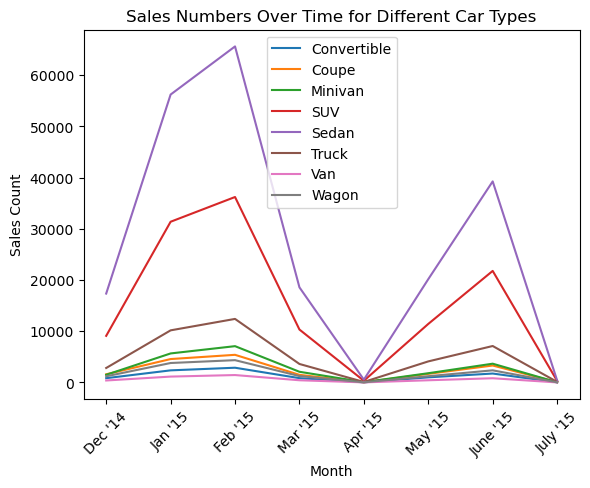

In [18]:
x_axis_dates = ["Dec '14", "Jan '15", "Feb '15", "Mar '15", "Apr '15", "May '15", "June '15", "July '15"]

fig, ax = plt.subplots()
x_axis =  np.arange(8)
tick_locations = [value for value in x_axis]

# Iterate over unique car types and plot sales count over time
for dictionary in type_dict_list:
    for name, type in dictionary.items():
        ax.plot(type.index, type['year'], label = name)

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Sales Count')
ax.set_title('Sales Numbers Over Time for Different Car Types')
plt.xticks(tick_locations, x_axis_dates, rotation=45)
ax.legend()

# Display the plot
plt.show()

# How do top selling car models trend over time? Does an increase in sales indicate changes in price (or other factors)?

In [19]:
# Alfred and Francisco code here.

Top 5 cars sold in 2024 from marketcheck.com

In [20]:
# search base URL
base_url = f"https://mc-api.marketcheck.com/v2/popular/cars?api_key={car_key}&car_type=new&country=us"


response = requests.get(base_url).json()
print(base_url)
print(json.dumps(response, indent=4, sort_keys=True))


https://mc-api.marketcheck.com/v2/popular/cars?api_key=hkwHViWcszguqrfsvqvFnBmuRSQIVNZ8&car_type=new&country=us
[
    {
        "count": 130243,
        "country": "us",
        "dom_stats": {
            "geometric_mean": 22,
            "iqr": 20,
            "listings_count": 0,
            "max": 1678,
            "mean": 29,
            "median": 25,
            "min": 1,
            "population_standard_deviation": 28,
            "standard_deviation": 28,
            "trimmed_mean": 26,
            "variance": 793
        },
        "make": "Toyota",
        "miles_stats": {
            "geometric_mean": 6,
            "iqr": 7,
            "listings_count": 33450,
            "max": 140797,
            "mean": 112,
            "median": 5,
            "min": 1,
            "population_standard_deviation": 2310,
            "standard_deviation": 2310,
            "trimmed_mean": 6,
            "variance": 5333860
        },
        "model": "RAV4",
        "price_stats": {
     

<Figure size 1000x600 with 0 Axes>

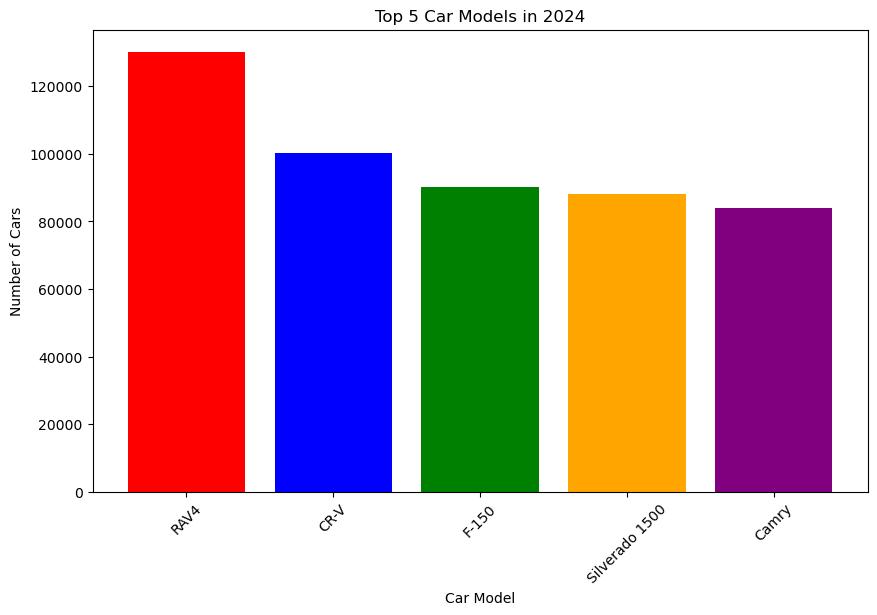

In [21]:
top50_df = pd.DataFrame(response)
top50_df
df_expanded = pd.concat([top50_df.drop(['price_stats'], axis=1), top50_df['price_stats'].apply(pd.Series)], axis=1)
df_expanded = df_expanded.drop("miles_stats", axis=1)
df_expanded = df_expanded.drop("dom_stats", axis=1)
df_expanded
plt.figure(figsize=(10, 6))  # Set the figure size
top_5_cars = df_expanded.head(5)  # Select the top 5 cars

plt.figure(figsize=(10, 6))  # Set the figure size

plt.bar(top_5_cars['model'], top_5_cars['count'], color = colors)  # Create the bar chart for the top 5 cars

plt.xlabel('Car Model')  # Set the x-axis label
plt.ylabel('Number of Cars')  # Set the y-axis label
plt.title('Top 5 Car Models in 2024')  # Set the title

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()  # Display the plot

TOp 5 Cars Sold from Dec 2014 to Jul 2015



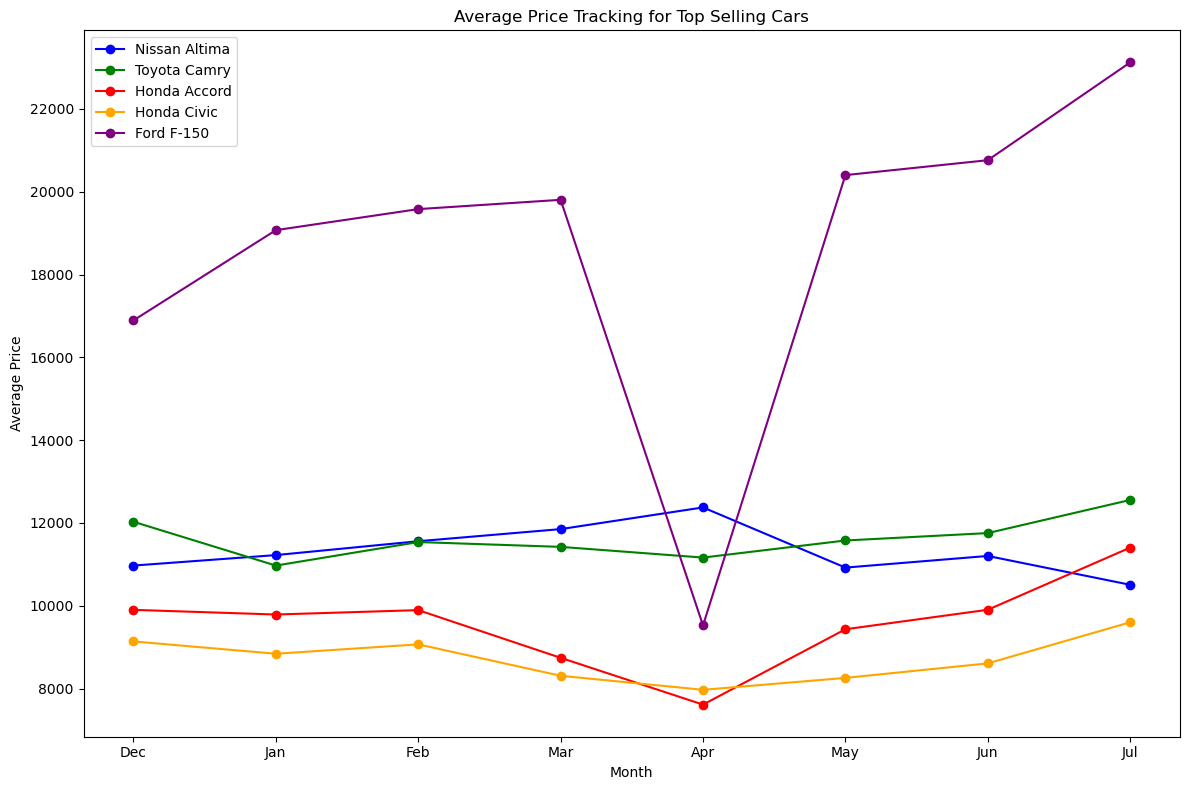

In [24]:
#Splitting date sold by its components of Date, Month and Year
cars_clean_df['saledate'] = cars_clean_df['saledate'].astype(str)
cars_clean_df['month'] = cars_clean_df['saledate'].str.split().str[1]
cars_clean_df['salesyear'] = cars_clean_df['saledate'].str.split().str[3]
cars_clean_df['day'] = cars_clean_df['saledate'].str.split().str[2]
# Define the custom order for months
custom_order = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']
colors = ['blue', 'green', 'red', 'orange', 'purple']
# Get the first month's top selling cars
first_month = custom_order[0]
top_selling_cars_first_month = cars_clean_df[cars_clean_df['month'] == first_month].groupby(['make', 'model']).size().reset_index(name='number_sold')
top_selling_cars_first_month = top_selling_cars_first_month.sort_values(by='number_sold', ascending=False).head(5)
tracked_cars = top_selling_cars_first_month[['make', 'model']].values

# Create a line plot for all tracked cars in one graph
plt.figure(figsize=(12, 8))

for i, (make, model) in enumerate(tracked_cars):
    car_data = []  # Store average price data for the car
    for month in custom_order:
        car_month_data = cars_clean_df[(cars_clean_df['month'] == month) & 
                                       (cars_clean_df['make'] == make) & 
                                       (cars_clean_df['model'] == model)]
        avg_price = car_month_data['sellingprice'].mean()
        car_data.append(avg_price)

    plt.plot(custom_order, car_data, marker='o', label=f'{make} {model}', color = colors[i])

plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price Tracking for Top Selling Cars')
plt.legend()
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('all_tracked_cars_avg_price_tracking.png')

plt.show()